In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from matplotlib import colors
warnings.filterwarnings('ignore')
%matplotlib inline

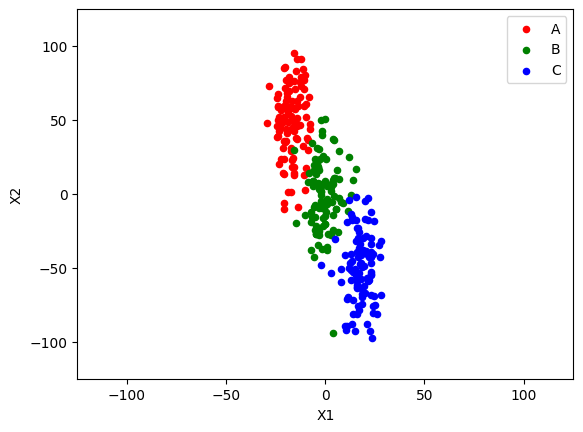

In [4]:
rng = np.random.default_rng(0)

A = pd.DataFrame(np.hstack([rng.normal(-17.5,5,(100,1)),rng.normal(50,25,(100,1))]), columns=['X1','X2'])
B = pd.DataFrame(np.hstack([rng.normal(0,5,(100,1)),rng.normal(0,25,(100,1))]), columns=['X1','X2'])
C = pd.DataFrame(np.hstack([rng.normal(17.5,5,(100,1)),rng.normal(-50,25,(100,1))]), columns=['X1','X2'])

fig, ax = plt.subplots()
A.plot.scatter(x='X1',y='X2',label='A',ax=ax,color='red')
B.plot.scatter(x='X1',y='X2',label='B',ax=ax,color='green')
C.plot.scatter(x='X1',y='X2',label='C',ax=ax,color='blue')
plt.xlim([-125,125])
plt.ylim([-125,125])
plt.show()

In [23]:
X = pd.concat([A,B,C])
model = KMeans(n_clusters=3, random_state=1).fit(X)

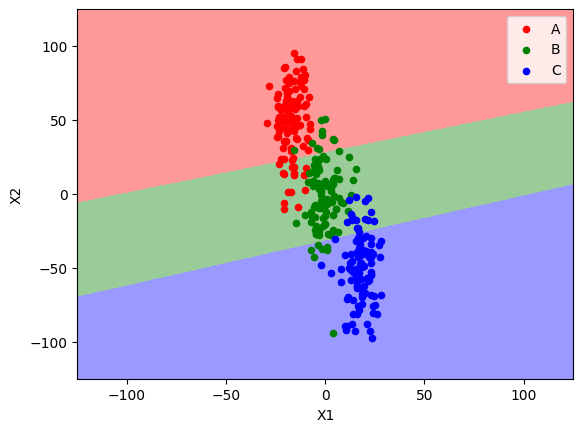

In [17]:
x_grid, y_grid = np.meshgrid(np.linspace(-125,125,1000),np.linspace(-125,125,1000))
cmap = colors.ListedColormap(['green','red','blue'])

z = model.predict(np.vstack([x_grid.ravel(),y_grid.ravel()]).T)
z = z.reshape(x_grid.shape)

fig, ax = plt.subplots()
A.plot.scatter(x='X1',y='X2',label='A',ax=ax,color='red')
B.plot.scatter(x='X1',y='X2',label='B',ax=ax,color='green')
C.plot.scatter(x='X1',y='X2',label='C',ax=ax,color='blue')

ax.imshow(z, interpolation='nearest', extent=(-125, 125, -125, 125),
          cmap=cmap, alpha=.4, aspect='auto', origin='lower')
plt.show()

In [32]:
# standardize data in relation to std from mean
# find mu
mu = X.mean()
# find std
std = X.std()
# scale X features
X_scaled = (X - mu)/std

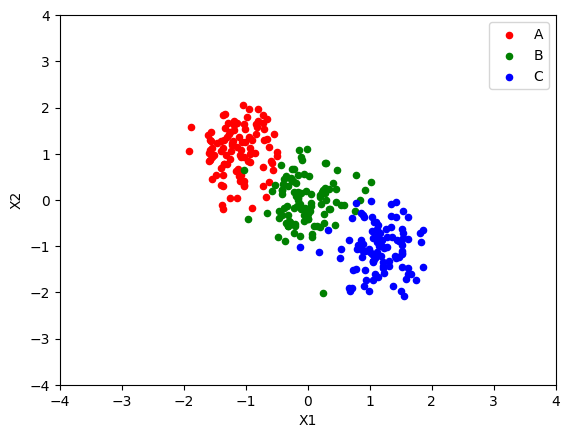

In [33]:
# plot standardized data
fig, ax = plt.subplots()
X_scaled[:100].plot.scatter(x='X1',y='X2',label='A',ax=ax,color='red')
X_scaled[100:200].plot.scatter(x='X1',y='X2',label='B',ax=ax,color='green')
X_scaled[200:300].plot.scatter(x='X1',y='X2',label='C',ax=ax,color='blue')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

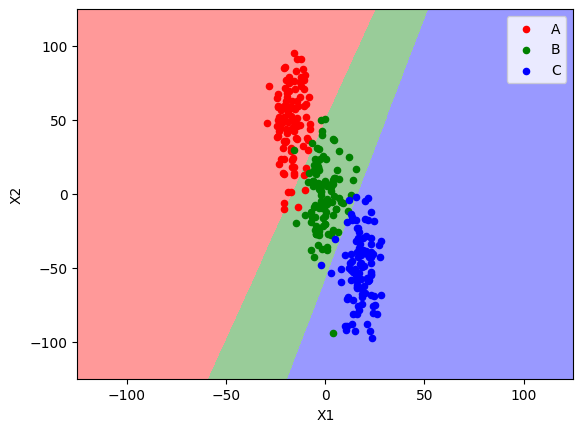

In [38]:
# build KMeans model on scaled points
model = KMeans(n_clusters=3, random_state=1).fit(X_scaled)
# standardize both boundaries 
x_grid_scaled = (x_grid - mu[0]) / std[0]
y_grid_scaled = (y_grid - mu[1]) / std[1]

cmap = colors.ListedColormap(['red','green','blue'])
z = model.predict(np.vstack([x_grid_scaled.ravel(),y_grid_scaled.ravel()]).T)
z = z.reshape(x_grid.shape)

fig, ax = plt.subplots()
A.plot.scatter(x='X1',y='X2',label='A',ax=ax,color='red')
B.plot.scatter(x='X1',y='X2',label='B',ax=ax,color='green')
C.plot.scatter(x='X1',y='X2',label='C',ax=ax,color='blue')

ax.imshow(z, interpolation='nearest', extent=(-125, 125, -125, 125),
          cmap=cmap, alpha=.4, aspect='auto', origin='lower')
plt.show()